In [42]:
from sklearn.datasets import load_iris
iris = load_iris()

In [43]:
type(iris)

sklearn.utils.Bunch

In [44]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [46]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [47]:
import numpy as np

np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [48]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
df.groupby('target').describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [50]:
import matplotlib.pyplot as plt

setosa = df[df['target'] == 0].iloc[:, :-1]
setosa.shape

(50, 4)

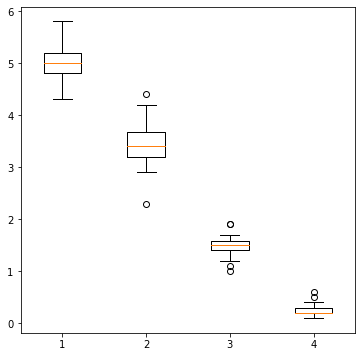

In [51]:
plt.figure(figsize=(6, 6))
plt.boxplot(setosa.T)
plt.show()

In [52]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2022)
X_train.shape

(112, 4)

In [54]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 38, 37]))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2022)
np.unique(y_train, return_counts=True)


(array([0, 1, 2]), array([40, 40, 40]))

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=2022)

In [59]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [60]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [ ]:
pred_df = dtc.predict(X_test)
res = pd.DataFrame({'y':y_test, 'DT':pred_df})
res

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_df)

0.9333333333333333

In [64]:
dtc.score(X_test, y_test)

0.9333333333333333

In [65]:
from sklearn.svm import SVC

svc = SVC(random_state=2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

In [68]:
pred_sv = svc.predict(X_test)

In [69]:
accuracy_score(y_test, pred_sv)

0.9333333333333333

In [71]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=2022, max_iter=500)

In [72]:
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [73]:
pred_lr = lrc.predict(X_test)

In [74]:
accuracy_score(y_test, pred_lr)

0.9333333333333333